In [1]:
from beta import read_csv
import os

In [2]:
folder = 'data/wig/beta/60'

files = os.listdir(folder)

longest = ''
length = 0
for f in files:
    entries = read_csv(f'{folder}/{f}', lambda row: row[0])
    entries = list(filter(lambda x: x != 'nan', entries))
    l = len(entries)
    print(l)

    if l > length:
        length = l
        longest = f


36
48
94
98
42
25
43
71
52
85
32
45
57
45
87
83
61
44
28
88
47
38
60
44
114
33
58
94
6
99
55
52
17
29
52
48
17
21
53
104
45
96
13
41
31
58
104
91
44
48
104
97
73
84
34
55
57
59
73
99
48
61
33
50
56
54
39
88
63
53
61
48
86
76
35
17
75
59
25
18
33
45
108
49
62
100
70
96
62
45
63
117
56
41
94
34
98
73
31
27
87
111
60
37
72
30
52
32
44
4
66
104
2
32
24
20
70
14
103
38
18
23
109
35
42
103
38
71
49
59
85
59
45
108
50
33
49
4
31
66
56
15
48
20
61
63
57
35
86
49
98
89
108
48
8
41
104
44
48
25
27
104
47
71
45
17
31
5
49
97
110
97
104
38
23
88
93
44
112
69
23
47
51
56
60
90
62
66
60
44
23
64
119
39
47
58
58
70
118
53
5
99
43
104
20
42
100
59
113
73
54
41
33
13
45
64
103
4
72
120
71
101
120
62
41
40
46
37
6
26
39
33
55
23
6
10
82
40
54
39
63
56
102
16
37
94
100
63
50
104
65
117
50
27
64
92
89
29
115
55
54
65
49
115
114
56
74
72
91
73
5
92
71
99
63
56
4
43
71
102
117
9
62
33
9
16
98
75
75
59
14
7
54
100
97
92
35
92
50
102
115
60
95
27
59
53
43
36
55
14
39
20
27
28
70
25
2
71
2
58
63
44
74
44
23
2


In [3]:
longest

'MIL.csv'

In [4]:
mil_beta = read_csv(f'{folder}/MIL.csv', lambda row: float(row[0]))
mil_beta

[0.8375510964928123,
 56.62589028509178,
 15.464205238148248,
 28.67806591615113,
 36.77603174765372,
 41.738252468079885,
 47.34900640785062,
 61.80547761923447,
 -8.417997582199483,
 66.27722938292271,
 94.8316747933619,
 29.541424276031343,
 35.528253941897795,
 21.079427939908545,
 68.34845018153581,
 23.015965882699184,
 1.8832909125439516,
 38.08016368957273,
 37.69067221962097,
 21.15638973251887,
 34.576945764857655,
 28.427971204160624,
 17.5914568220189,
 1.3803099255568143,
 8.855910811884849,
 -10.132141892284913,
 7.887261123439072,
 2.982093794158855,
 4.7266715298875575,
 18.60276569345064,
 10.754300432729991,
 17.31686767364797,
 4.300633917634505,
 10.742243284964749,
 -3.4872980073988145,
 25.452375602229488,
 17.15406308727004,
 66.48039530118942,
 33.42668729357278,
 14.514191445925348,
 12.283152162238796,
 165.10469872437827,
 8.523256668392301,
 80.71250760661,
 36.55835161417956,
 -10.672257121161646,
 60.06859828552543,
 29.805891129460424,
 20.568838790261985

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

ModuleNotFoundError: No module named 'statsmodels'

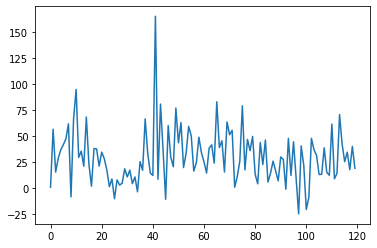

In [19]:
df = pd.DataFrame(data=mil_beta)
df.head(10)

plt.plot(df)

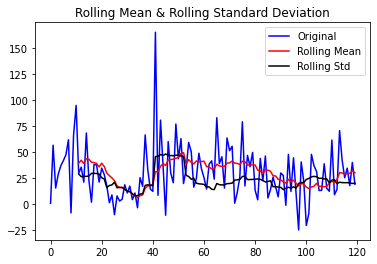

In [20]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()